In [68]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter
from utils.FeatureSelection import FeatureSelection

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [69]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')
df = pd.read_csv(f"{file_path}/8.gurgaon_properties_missing_value_imputation.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


In [70]:
df.shape

(3554, 18)

# ---------------- Feature Engineering Operation ---------------------------

In [71]:
## Column drop in 
train_df = df.drop(columns=['society','price_per_sqft'])
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


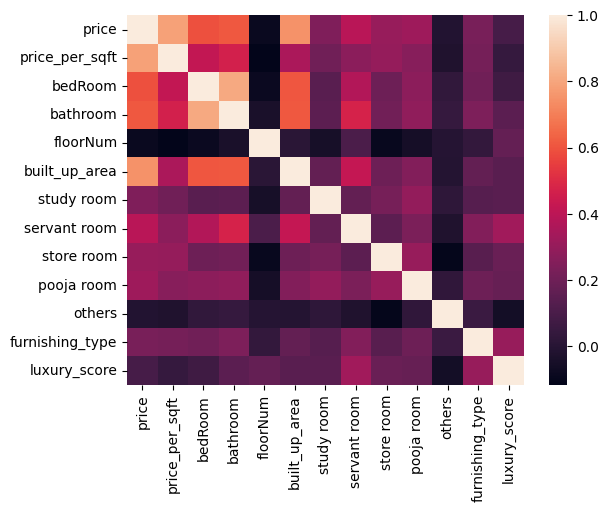

In [72]:
## Correlation between all numerical columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr())
plt.show()

In [73]:
## Correlation Price Vs all numerical Columns
numeric_df.corr()['price'].sort_values(ascending=False)

price              1.000000
price_per_sqft     0.787437
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225625
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [74]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### luxury_score Deep Analysis

categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


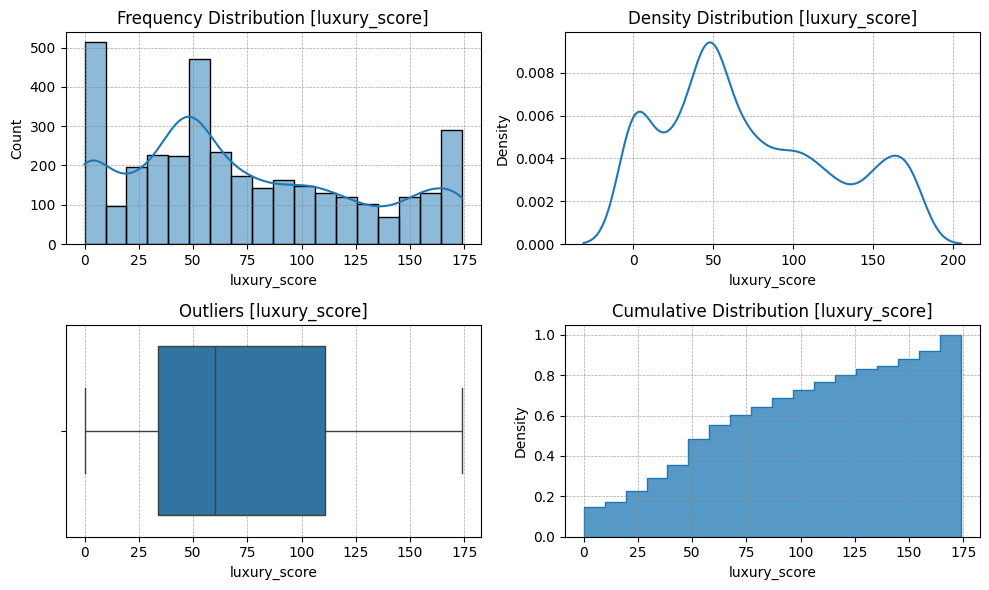

In [75]:
df_uni = UnivariateAnalysis(train_df)
print(df_uni)
a,b = df_uni.NumericalFeatureAnalysis('luxury_score')

### Adding luxury_category form [luxury_score Manual Binning (Rule-Based Binning)]

In [76]:
## Adding luxury_category column using Manual Binning 

def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [77]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159,High


categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession', 'luxury_category']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


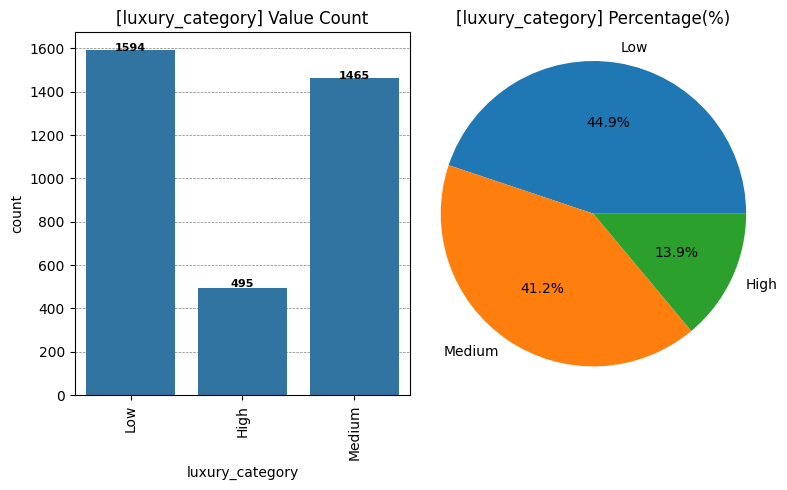

,field,luxury_category
0,non_null_count,3554
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,3
5,top_value,Low
6,top_count,1594
7,top_pct,44.85
8,top_3,"[Low, Medium, High]"
9,top_3_pct,"[44.85, 41.22, 13.93]"


In [78]:
### Data Visualization for luxury_category column 

df_uni = UnivariateAnalysis(train_df)
print(df_uni)
df_uni.CategoricalFeaturesAnalysis('luxury_category')

### Adding floor_category form [floorNum luxury_score Manual Binning (Rule-Based Binning)]

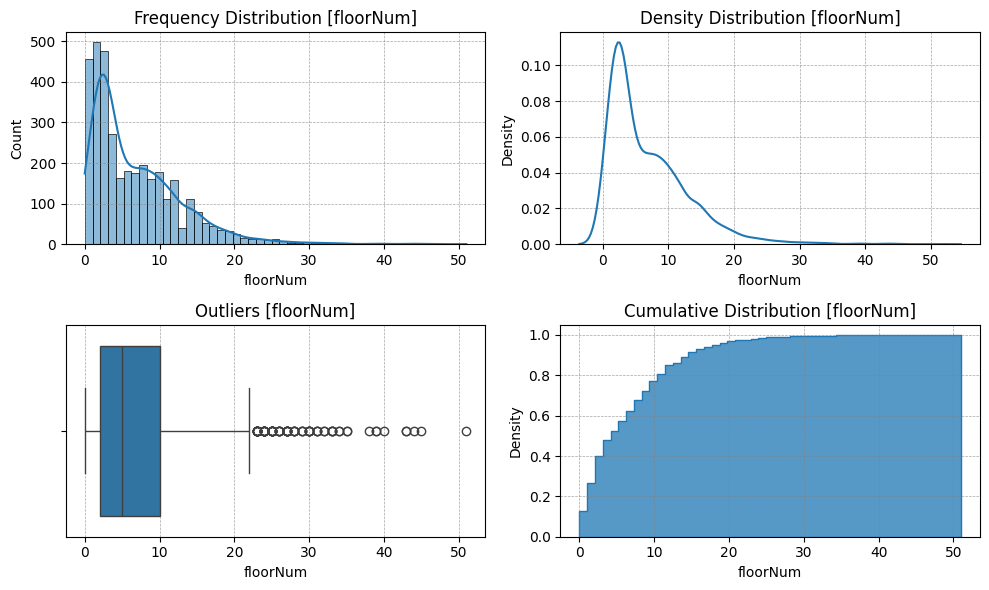

In [79]:
## Initial Observation 
df_uni = UnivariateAnalysis(train_df)
a,b = df_uni.NumericalFeatureAnalysis('floorNum')

In [80]:
## Adding floor_category column using Manual Binning 
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins
    
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159,High,Mid Floor


In [81]:
## Export dataframe pre categorical Tranformation

export_post_categorical_tran = train_df.copy()
export_post_categorical_tran.drop(columns=['pooja room', 'study room', 'luxury_score','floorNum','others'], inplace=True)
export_post_categorical_tran.to_csv(f"{file_path}/10.gurgaon_properties_post_feature_selection_v2.csv", index=False)


categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession', 'luxury_category', 'floor_category']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


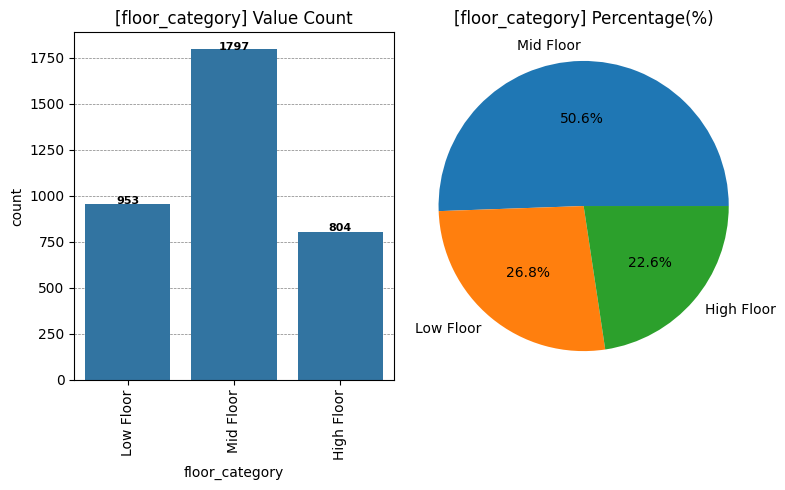

,field,floor_category
0,non_null_count,3554
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,3
5,top_value,Mid Floor
6,top_count,1797
7,top_pct,50.56
8,top_3,"[Mid Floor, Low Floor, High Floor]"
9,top_3_pct,"[50.56, 26.81, 22.62]"


In [46]:
### Data Visualization for luxury_category column 

df_uni = UnivariateAnalysis(train_df)
print(df_uni)
df_uni.CategoricalFeaturesAnalysis('floor_category')

In [47]:
## Column drop 'floorNum','luxury_score'
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)
train_df.head(2)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,New Property,850.0,0,0,0,0,0,0,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,New Property,1226.0,1,1,0,0,0,0,Low,Mid Floor


In [48]:
len(train_df.columns)

16

### Categorical Column Encoding

In [49]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

# Categorical Column filter
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
   
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.feature_names_in_)
    print(f"{oe.categories_}\n")

['property_type']
[array(['flat', 'house'], dtype=object)]

['sector']
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 6

In [50]:
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

# ---------------------- Feature Selection Operation ---------------------

#### Technique 1 - Correlation Analysis

<Axes: >

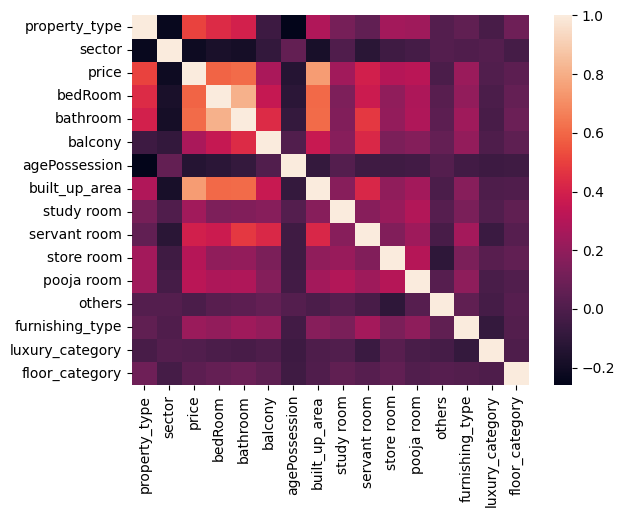

In [51]:
sns.heatmap(data_label_encoded.corr())

In [52]:
feature = FeatureSelection(data_label_encoded)

fi_df1_corr = feature.CorrFeatureSelection(dependent_col='price')
fi_df1_corr

,feature,corr_coeff
6,built_up_area,0.748574
3,bathroom,0.609777
2,bedRoom,0.591289
0,property_type,0.503728
8,servant room,0.391930
10,pooja room,0.319852
9,store room,0.305677
4,balcony,0.269637
7,study room,0.242955
12,furnishing_type,0.225625


#### Technique 2 - Random Forest Feature Importance

In [53]:
feature = FeatureSelection(data_label_encoded)
fi_df2_rfr = feature.RFRFeatureSelection(dependent_col='price')
fi_df2_rfr

,feature,rf_importance
6,built_up_area,0.650541
1,sector,0.102670
0,property_type,0.100079
3,bathroom,0.025882
2,bedRoom,0.024041
8,servant room,0.019320
5,agePossession,0.014519
4,balcony,0.012576
12,furnishing_type,0.010604
7,study room,0.008383


### Technique 3 - Gradient Boosting Feature importances

In [54]:
feature = FeatureSelection(data_label_encoded)
fi_df3_gbr = feature.GBRFeatureSelection(dependent_col='price')
fi_df3_gbr

,feature,gb_importance
6,built_up_area,0.677671
1,sector,0.102848
0,property_type,0.098408
2,bedRoom,0.038167
3,bathroom,0.035814
8,servant room,0.023195
9,store room,0.010356
5,agePossession,0.004231
7,study room,0.003068
12,furnishing_type,0.003029


### Technique 4 - Permutation Importance


In [55]:
feature = FeatureSelection(data_label_encoded)
fi_df4_pm = feature.PermutationFeatureSelection(dependent_col='price')
fi_df4_pm

,feature,permutation_importance
6,built_up_area,0.736026
0,property_type,0.200636
1,sector,0.178881
8,servant room,0.021018
3,bathroom,0.019884
2,bedRoom,0.018006
5,agePossession,0.004970
9,store room,0.002150
14,floor_category,0.000907
11,others,0.000792


### Technique 5 - LASSO

In [56]:
feature = FeatureSelection(data_label_encoded)
fi_df5_lasso = feature.LassoFeatureSelection(dependent_col='price')
fi_df5_lasso

,feature,lasso_coeff
6,built_up_area,1.510173
0,property_type,0.713829
3,bathroom,0.275042
9,store room,0.199655
7,study room,0.171846
12,furnishing_type,0.164113
8,servant room,0.160601
10,pooja room,0.073845
13,luxury_category,0.055268
2,bedRoom,0.014170


### Technique 6 - RFE

In [57]:
feature = FeatureSelection(data_label_encoded)
fi_df6_rfe = feature.RecursiveFeatureElimination(dependent_col='price')
fi_df6_rfe

,feature,rfe_score
6,built_up_area,0.649667
1,sector,0.102674
0,property_type,0.098638
2,bedRoom,0.028039
3,bathroom,0.025614
8,servant room,0.018837
5,agePossession,0.014162
4,balcony,0.012733
12,furnishing_type,0.010942
7,study room,0.008498


### Technique 7 - Linear Regression Weights

In [58]:
feature = FeatureSelection(data_label_encoded)
fi_df7_lin = feature.LinerRegressionFeature(dependent_col='price')
fi_df7_lin

,feature,reg_coeffs
6,built_up_area,1.512629
0,property_type,0.712890
3,bathroom,0.281976
9,store room,0.204159
7,study room,0.180048
12,furnishing_type,0.173192
8,servant room,0.169605
10,pooja room,0.076893
13,luxury_category,0.066472
2,bedRoom,0.016790


### Technique 8 - SHAP

In [59]:
feature = FeatureSelection(data_label_encoded)
fi_df8_shap = feature.ShapFeature(dependent_col='price')
fi_df8_shap

,feature,SHAP_score
6,built_up_area,1.255552
0,property_type,0.473110
1,sector,0.383640
3,bathroom,0.112811
8,servant room,0.095577
2,bedRoom,0.049731
4,balcony,0.040327
12,furnishing_type,0.027405
5,agePossession,0.027312
14,floor_category,0.024505


## All Feature Selection data frame merge

In [60]:
final_fi_df = fi_df1_corr.merge(fi_df2_rfr,on='feature').merge(fi_df3_gbr,on='feature').merge(fi_df4_pm,on='feature').merge(fi_df5_lasso,on='feature').merge(fi_df6_rfe,on='feature').merge(fi_df7_lin,on='feature').merge(fi_df8_shap,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.748574,0.650541,0.677671,0.736026,1.510173,0.649667,1.512629,1.255552
bathroom,0.609777,0.025882,0.035814,0.019884,0.275042,0.025614,0.281976,0.112811
bedRoom,0.591289,0.024041,0.038167,0.018006,0.014170,0.028039,0.016790,0.049731
property_type,0.503728,0.100079,0.098408,0.200636,0.713829,0.098638,0.712890,0.473110
servant room,0.391930,0.019320,0.023195,0.021018,0.160601,0.018837,0.169605,0.095577
pooja room,0.319852,0.006126,0.000544,-0.001078,0.073845,0.005786,0.076893,0.011505
store room,0.305677,0.008329,0.010356,0.002150,0.199655,0.008324,0.204159,0.017123
balcony,0.269637,0.012576,0.001801,-0.000432,-0.043562,0.012733,-0.066353,0.040327
study room,0.242955,0.008383,0.003068,-0.018027,0.171846,0.008498,0.180048,0.019533


In [61]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.191831,0.650541,0.677671,0.637924,0.471109,0.649667,0.471376,0.490218
bathroom,0.156263,0.025882,0.035814,0.017233,0.085801,0.025614,0.087871,0.044046
bedRoom,0.151525,0.024041,0.038167,0.015606,0.004420,0.028039,0.005232,0.019417
property_type,0.129086,0.100079,0.098408,0.173894,0.222684,0.098638,0.222156,0.184721
servant room,0.100437,0.019320,0.023195,0.018217,0.050100,0.018837,0.052854,0.037317
pooja room,0.081966,0.006126,0.000544,-0.000934,0.023037,0.005786,0.023962,0.004492
store room,0.078333,0.008329,0.010356,0.001863,0.062284,0.008324,0.063621,0.006686
balcony,0.069098,0.012576,0.001801,-0.000374,-0.013590,0.012733,-0.020677,0.015745
study room,0.062260,0.008383,0.003068,-0.015625,0.053609,0.008498,0.056108,0.007626


In [62]:
## Calulation Mean for accross all Feature Importance Score Column
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.621204
property_type      0.131148
sector             0.122604
bathroom           0.029718
bedRoom            0.025054
servant room       0.023377
agePossession      0.009577
balcony            0.008496
store room         0.007112
furnishing_type    0.005239
floor_category     0.004697
luxury_category    0.004215
pooja room         0.003203
study room         0.002390
others             0.001966
dtype: float64

### Experiment Before Dropping Low Scored Columns 
- pooja room, study room, others

In [63]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,0,0,0,1.0,1.0
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,0,1.0,2.0
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,0,1.0,0.0
3,0.0,99.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,1,0.0,2.0
4,0.0,5.0,2,2,1.0,3.0,582.0,0,0,1,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,0,0,0,2.0,2.0
3550,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,0,0.0,1.0
3551,0.0,23.0,1,1,1.0,0.0,665.0,0,0,0,0,0,1,2.0,2.0
3552,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,0,2.0,2.0


In [64]:
## Random Forest with All Columns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.8193190510339333)

In [65]:
## Random Forest with Out 'pooja room', 'study room', 'others'
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.8196500940616491)

In [66]:
## After Reviewing the score it is safe to Drop to columns=['pooja room', 'study room', 'others']
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [67]:
export_df.to_csv(f'{file_path}/9.gurgao_properties_post_feature_selection.csv', index=False)